In [1]:
!pip install opendatasets

In [639]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

od.download(
    "https://www.kaggle.com/datasets/mcpenguin/raw-malaysian-housing-prices-data/data"
)

Skipping, found downloaded files in ".\raw-malaysian-housing-prices-data" (use force=True to force download)


In [1703]:
# Import dataset
df = pd.read_csv('houses.csv')

In [1705]:
pd.set_option('display.max_columns', None)

df.head()

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,Developer,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,Kenwingston Group,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",-,-,-,Service Residence,2,-,Non Bumi Lot,VE,30338,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),-,Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",-,-,-,Apartment,1,Low,Non Bumi Lot,E,30812,REN 15862,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",2007,13,445,Apartment,1,Medium,Non Bumi Lot,-,-,-,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,-,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",-,-,-,Flat,1,-,Non Bumi Lot,E,11584,REN 16279,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",-,43,956,Studio,-,Low,Bumi Lot,E,31916,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN


In [1706]:
df.shape

(4000, 32)

In [1709]:
df.dtypes

description               object
Bedroom                   object
Bathroom                  object
Property Size             object
Nearby School             object
Nearby Mall               object
Ad List                    int64
Category                  object
Facilities                object
Building Name             object
Developer                 object
Tenure Type               object
Address                   object
Completion Year           object
# of Floors               object
Total Units               object
Property Type             object
Parking Lot               object
Floor Range               object
Land Title                object
Firm Type                 object
Firm Number               object
REN Number                object
Bus Stop                  object
Mall                      object
Park                      object
School                    object
Hospital                  object
price                     object
Highway                   object
Nearby Rai

# Data Cleaning

## Duplicates

In [1712]:
df.duplicated().value_counts()

False    3815
True      185
Name: count, dtype: int64

In [1713]:
df = df.drop_duplicates(subset=df.columns.tolist())

In [1714]:
df.shape

(3815, 32)

## Redundant Features

In [1716]:
removable_features = ['description','Ad List','Category','Building Name','Firm Type','Firm Number','REN Number']

In [1718]:
for feature in removable_features:
    print(f'Number of unique featues for {feature}: {len(df[feature].value_counts(dropna=False))}')
    print('\n')

Number of unique featues for description: 3689


Number of unique featues for Ad List: 3793


Number of unique featues for Category: 1


Number of unique featues for Building Name: 1938


Number of unique featues for Firm Type: 9


Number of unique featues for Firm Number: 337


Number of unique featues for REN Number: 964




In [1720]:
df = df.drop(removable_features, axis=1)

## Rename Features

In [1722]:
df = df.rename(columns={'Property Size':'Property_Size_sqft',
                        'Nearby School':'Nearby_School',
                        'Nearby Mall':'Nearby_Mall',
                        'Tenure Type':'Tenure_Type',
                        'Completion Year':'Completion_Year',
                        '# of Floors':'Floors',
                        'Total Units':'Total_Units',
                        'Property Type':'Property_Type',
                        'Parking Lot':'Parking_Lot',
                        'Floor Range':'Floor_Range',
                        'Land Title':'Land_Title',
                        'Bus Stop':'Bus_Stop',
                        'Nearby Railway Station':'Nearby_Railway_Station',
                        'Railway Station':'Railway_Station',
                        'price':'price_rm'
                       }
              )

## Adjust String (Property Size, Price)

In [1724]:
df[['Property_Size_sqft','price_rm']].isna().sum()

Property_Size_sqft    0
price_rm              0
dtype: int64

In [1725]:
df['Property_Size_sqft'] = df['Property_Size_sqft'].astype('str').str.replace(' sq.ft.', '').astype('int64')

In [1728]:
df['price_rm'] = (df['price_rm'].str.replace('RM','').str.replace(' ','').str.strip().astype('float'))

In [1729]:
df[['Property_Size_sqft','price_rm']].dtypes

Property_Size_sqft      int64
price_rm              float64
dtype: object

In [1731]:
df[['Property_Size_sqft','price_rm']].head()

,Property_Size_sqft,price_rm
0,1000,340000.0
1,980,250000.0
2,1000,230000.0
3,592,158000.0
4,467,305000.0


## Numeric Features

In [1733]:
numeric = ['Bedroom','Bathroom','Property_Size_sqft','Completion_Year','Floors','Total_Units','Parking_Lot']

for feature in numeric:
    df[feature] = df[feature].replace('-',np.nan)
    print(f'Missing values for feature {feature}: {df[feature].isna().sum()}')
    print('\n')

Missing values for feature Bedroom: 1


Missing values for feature Bathroom: 1


Missing values for feature Property_Size_sqft: 0


Missing values for feature Completion_Year: 1914


Missing values for feature Floors: 1655


Missing values for feature Total_Units: 1806


Missing values for feature Parking_Lot: 1167




### Drop negligible amounts of missing data

In [1735]:
df = df.dropna(subset=['Bedroom','Bathroom'])

In [1736]:
df.shape

(3814, 25)

### Imputation of Missing Values

In [1738]:
imputation = ['Completion_Year','Floors','Total_Units','Parking_Lot']

for feature in imputation:
    df[feature] = df[feature].astype('float')
    print(f'Descriptive Statistic for {feature}:\n{df[feature].describe()}')
    print('\n')

Descriptive Statistic for Completion_Year:
count    1901.000000
mean     2011.413993
std         8.015025
min      1985.000000
25%      2006.000000
50%      2014.000000
75%      2017.000000
max      2026.000000
Name: Completion_Year, dtype: float64


Descriptive Statistic for Floors:
count    2160.000000
mean       21.771296
std        26.259307
min         2.000000
25%        12.000000
50%        20.000000
75%        28.000000
max       504.000000
Name: Floors, dtype: float64


Descriptive Statistic for Total_Units:
count    2009.000000
mean      613.333499
std       587.444602
min         1.000000
25%       290.000000
50%       462.000000
75%       754.000000
max      7810.000000
Name: Total_Units, dtype: float64


Descriptive Statistic for Parking_Lot:
count    2648.000000
mean        1.508686
std         0.688784
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: Parking_Lot, dtype: float64




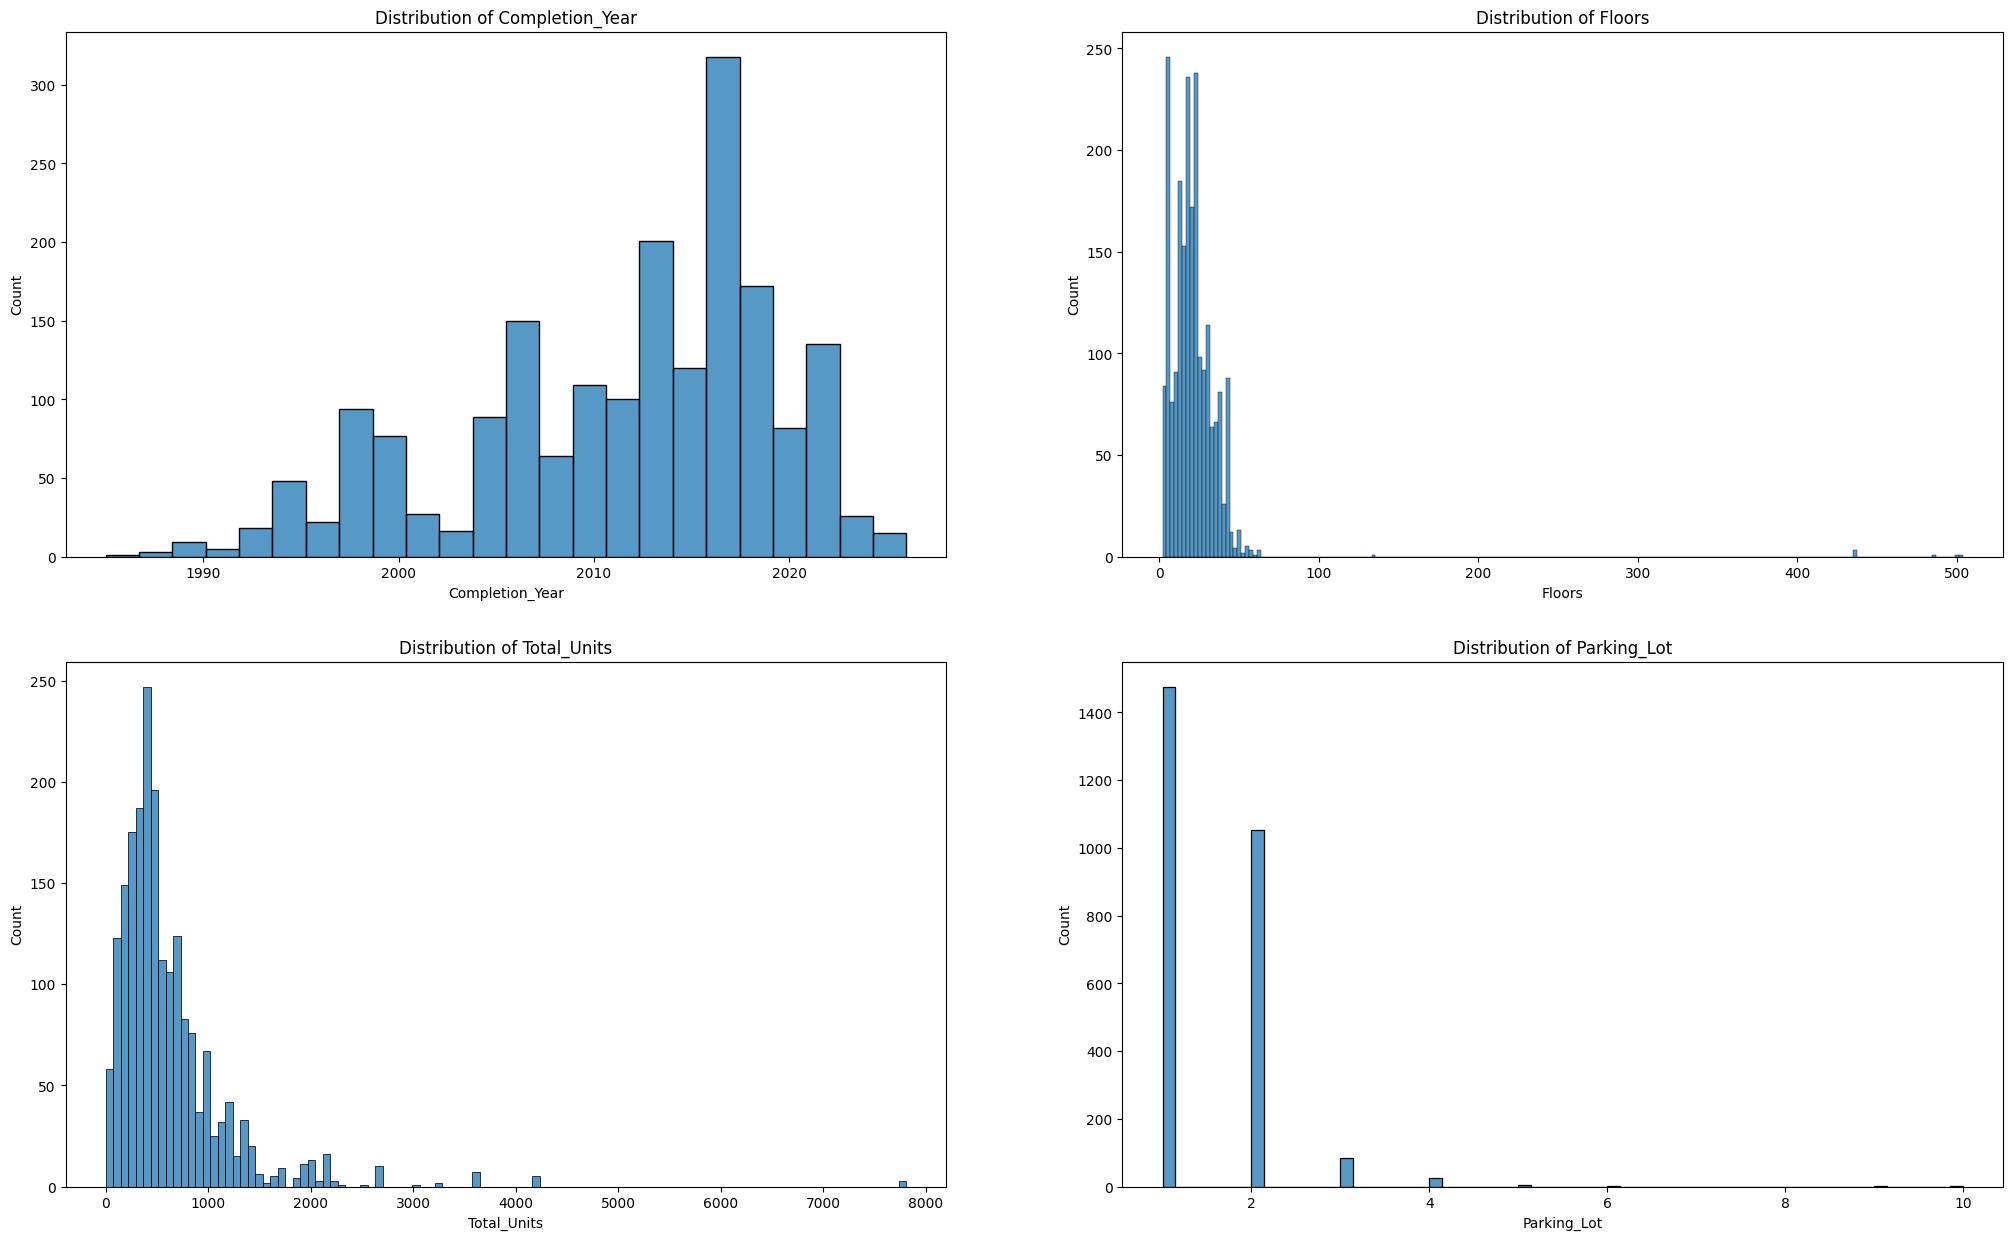

In [1739]:
imputation = ['Completion_Year','Floors','Total_Units','Parking_Lot']

fig, axes = plt.subplots(2,2, figsize=(25,15))
axes = axes.flatten()

for i, feature in enumerate(imputation):
    sns.histplot(ax=axes[i], x=df[feature].sort_values())
    axes[i].set_title(f'Distribution of {feature}')

In [1740]:
impute_median = ['Completion_Year','Floors','Total_Units']

for feature in impute_median:
    df[feature] = df[feature].fillna(df[feature].median())

In [1741]:
#Removing Outliers

df = df[(df['Floors'] <= 100)]
df = df[(df['Total_Units'] <= 3000)]

In [1742]:
df[impute_median+['price_rm']].corr()

,Completion_Year,Floors,Total_Units,price_rm
Completion_Year,1.000000,0.253299,0.165816,0.100033
Floors,0.253299,1.000000,0.349590,0.203316
Total_Units,0.165816,0.349590,1.000000,-0.050001
price_rm,0.100033,0.203316,-0.050001,1.000000


In [1743]:
#Drop Total_Units ue to weak negative correlation

df = df.drop(['Total_Units'], axis=1)

In [1744]:
#Impute Parking Lot with Mode

df['Parking_Lot'] = df['Parking_Lot'].fillna(df['Parking_Lot'].mode()[0])

In [1745]:
df[['Completion_Year','Floors','Parking_Lot']] = df[['Completion_Year','Floors','Parking_Lot']].astype('int64')

In [1746]:
new_numeric = ['Bedroom','Bathroom','Property_Size_sqft','Floors','Completion_Year','Parking_Lot']

for feature in new_numeric:
    df[feature] = df[feature].astype('int64')
    print(f'Missing values for feature {feature}: {df[feature].isna().sum()}')
    print('\n')

Missing values for feature Bedroom: 0


Missing values for feature Bathroom: 0


Missing values for feature Property_Size_sqft: 0


Missing values for feature Floors: 0


Missing values for feature Completion_Year: 0


Missing values for feature Parking_Lot: 0




In [1747]:
df.shape

(3789, 24)

## Categorical Features

In [1749]:
df.head()

,Bedroom,Bathroom,Property_Size_sqft,Nearby_School,Nearby_Mall,Facilities,Developer,Tenure_Type,Address,Completion_Year,Floors,Property_Type,Parking_Lot,Floor_Range,Land_Title,Bus_Stop,Mall,Park,School,Hospital,price_rm,Highway,Nearby_Railway_Station,Railway_Station
0,4,2,1000,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,-,Kenwingston Group,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",2014,20,Service Residence,2,-,Non Bumi Lot,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,340000.0,NaN,NaN,NaN
1,3,2,980,NaN,NaN,"Parking, Security, Swimming Pool, Playground, ...",-,Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",2014,20,Apartment,1,Low,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,250000.0,NaN,NaN,NaN
2,3,2,1000,NaN,NaN,"Playground, Minimart, Jogging Track, Barbeque ...",TLS Group,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",2007,13,Apartment,1,Medium,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,230000.0,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,3,1,592,NaN,NaN,"Parking, Playground, Minimart, Jogging Track",-,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",2014,20,Flat,1,-,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,158000.0,NaN,NaN,NaN
4,1,1,467,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,"Minimart, Gymnasium, Parking, Security",i-Berhad,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",2014,43,Studio,1,Low,Bumi Lot,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,305000.0,NaN,NaN,NaN


In [1750]:
categorical = df.select_dtypes(include='object').columns

In [1751]:
df[categorical] = df[categorical].replace('-',np.nan)
df[categorical].isna().sum()

Nearby_School             3139
Nearby_Mall               3453
Facilities                 608
Developer                 1646
Tenure_Type                  0
Address                     84
Property_Type                0
Floor_Range               1007
Land_Title                   0
Bus_Stop                  3124
Mall                      3348
Park                      3025
School                    2886
Hospital                  3469
Highway                   3659
Nearby_Railway_Station    3452
Railway_Station           3337
dtype: int64

### Facilities

In [1753]:
df['Facilities'].value_counts()

Facilities
Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Sauna, Barbeque area, Minimart, Multipurpose hall, Club house, Jogging Track, Tennis Court, Squash Court    139
Parking, Security, Lift                                                                                                                                                     73
Parking, Security                                                                                                                                                           50
Parking                                                                                                                                                                     42
Parking, Security, Lift, Swimming Pool, Playground                                                                                                                          26
                                                                                                                  

In [1754]:
df['Facilities'] = df['Facilities'].fillna('')

df['Facilities'] = df['Facilities'].apply(lambda x: [f.strip() for f in x.split(',') if f.strip()])

unique_facilities = set(facility for facilities in df['Facilities'] for facility in facilities)

for facility in unique_facilities:
    df[facility] = df['Facilities'].apply(lambda x: int(facility in x))


In [1755]:
df[df['10'] == 1]

,Bedroom,Bathroom,Property_Size_sqft,Nearby_School,Nearby_Mall,Facilities,Developer,Tenure_Type,Address,Completion_Year,Floors,Property_Type,Parking_Lot,Floor_Range,Land_Title,Bus_Stop,Mall,Park,School,Hospital,price_rm,Highway,Nearby_Railway_Station,Railway_Station,Barbeque area,Squash Court,Minimart,Playground,Lift,Multipurpose hall,Tennis Court,Swimming Pool,Security,Gymnasium,Jogging Track,Sauna,10,Parking,Club house
1349,3,2,1223,NaN,NaN,"[Swimming Pool, Playground, Lift, Gymnasium, P...",NaN,Leasehold,NaN,2014,20,Condominium,1,Medium,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,670000.0,NaN,NaN,NaN,0,1,0,1,1,0,0,1,1,1,0,0,1,1,0


In [1756]:
df = df.drop(['10','Facilities'], axis=1)

In [1757]:
df.shape

(3789, 37)

### Developer

In [1759]:
df['Developer'].value_counts()

Developer
Ideal Property Group            67
Belleview Group                 61
Asia Green Group                51
IJM LAND BERHAD                 48
TLS Group                       29
                                ..
NATWEST DEVELOPMENT SDN. BHD     1
Intan Permata Properties         1
Mah Sing Group Bhd               1
VILLAMAS                         1
Aurora Properties Sdn Bhd        1
Name: count, Length: 575, dtype: int64

In [1761]:
df['Developer'] = df['Developer'].replace(np.nan,'Unknown')

top_devs = df['Developer'].value_counts().nlargest(20).index

df['Developer'] = df['Developer'].apply(lambda x: x if x in top_devs else 'Other')

In [1764]:
df['Developer'].value_counts()

Developer
Unknown                                       1646
Other                                         1617
Ideal Property Group                            67
Belleview Group                                 61
Asia Green Group                                51
IJM LAND BERHAD                                 48
TLS Group                                       29
Syarikat Perumahan Negara Berhad                26
Setia Promenade Sdn Bhd (SP Setia)              25
GSD Land (M) Sdn Bhd                            22
Reka Indah Development Sdn Bhd                  21
Mah Sing Group Berhad                           19
Hunza Properties Berhad                         19
Arte Corp                                       19
IOI Properties Group Berhad                     18
SCP Group                                       18
PLB Land Sdn Bhd                                18
Perbadanan Kemajuan Negeri Selangor (PKNS)      17
Malaysia Land Properties Sdn. Bhd.              16
MK Land Holdings     

### Address to State

In [1768]:
df['State'] = df['Address'].str.split(',').str[-1].str.strip()

In [1769]:
df['State'].value_counts(dropna=False)

State
Selangor                 1166
Penang                    964
Kuala Lumpur              619
Johor                     379
Sabah                     148
                         ... 
Sungai Ara                  1
Bachang                     1
Labuan                      1
Bandar Mahkota Cheras       1
Telipok                     1
Name: count, Length: 82, dtype: int64

In [1770]:
df['State'] = df['State'].replace(np.nan, 'Unknown')
df['State'] = df['State'].astype('str').str.strip().replace({'Putrajaya':'Selangor',
                                                          'Kajang':'Selangor',
                                                          'Kuching':'Sarawak',
                                                          'Klang':'Selangor',
                                                          'Seri Kembangan':'Selangor',
                                                          'Ampang':'Selangor',
                                                          'Bukit Jalil':'Kuala Lumpur',
                                                          'Cyberjaya':'Selangor',
                                                              'Cheras':'Selangor'
                                                         })

In [1771]:
top_states = df['State'].value_counts().nlargest(11)
df['State'] = df['State'].apply(lambda x: x if x in top_states else 'Other')  

In [1772]:
df['State'].value_counts(dropna=False)

State
Selangor           1261
Penang              964
Kuala Lumpur        625
Johor               379
Sabah               148
Sarawak             120
Other               106
Unknown              84
Melaka               52
Negeri Sembilan      21
Pahang               15
Perak                14
Name: count, dtype: int64

In [1773]:
print(f"{top_states.sum()/df['State'].shape[0]*100:.2f}% of states data have been accounted for.")

97.20% of states data have been accounted for.


In [1774]:
df = df.drop(['Address'],axis=1)

### Floor Range

In [1776]:
df['Floor_Range'].value_counts(dropna=False)

Floor_Range
Medium    1335
NaN       1007
High       794
Low        653
Name: count, dtype: int64

In [1779]:
df['Floor_Range'] = df['Floor_Range'].replace(np.nan,'Medium')
df['Floor_Range'].value_counts(dropna=False)

Floor_Range
Medium    2342
High       794
Low        653
Name: count, dtype: int64

In [1780]:
df['Floor_Range'] = df['Floor_Range'].astype('object')

### Impute Missing Values 

In [1784]:
df[[col for col in categorical if col not in ['Facilities', 'Address']]].isna().sum()


Nearby_School             3139
Nearby_Mall               3453
Developer                    0
Tenure_Type                  0
Property_Type                0
Floor_Range                  0
Land_Title                   0
Bus_Stop                  3124
Mall                      3348
Park                      3025
School                    2886
Hospital                  3469
Highway                   3659
Nearby_Railway_Station    3452
Railway_Station           3337
dtype: int64

In [1787]:
missing_categorical = df.columns[df.isna().any()].tolist()
missing_categorical

['Nearby_School',
 'Nearby_Mall',
 'Bus_Stop',
 'Mall',
 'Park',
 'School',
 'Hospital',
 'Highway',
 'Nearby_Railway_Station',
 'Railway_Station']

In [1788]:
for feature in missing_categorical:
    df[feature] = df[feature].notna().astype('int64')

In [1789]:
df[missing_categorical].isna().sum()

Nearby_School             0
Nearby_Mall               0
Bus_Stop                  0
Mall                      0
Park                      0
School                    0
Hospital                  0
Highway                   0
Nearby_Railway_Station    0
Railway_Station           0
dtype: int64

In [1790]:
for feature in missing_categorical:
    print(df[feature].value_counts())
    print('\n')

Nearby_School
0    3139
1     650
Name: count, dtype: int64


Nearby_Mall
0    3453
1     336
Name: count, dtype: int64


Bus_Stop
0    3124
1     665
Name: count, dtype: int64


Mall
0    3348
1     441
Name: count, dtype: int64


Park
0    3025
1     764
Name: count, dtype: int64


School
0    2886
1     903
Name: count, dtype: int64


Hospital
0    3469
1     320
Name: count, dtype: int64


Highway
0    3659
1     130
Name: count, dtype: int64


Nearby_Railway_Station
0    3452
1     337
Name: count, dtype: int64


Railway_Station
0    3337
1     452
Name: count, dtype: int64




### Dummies

In [1793]:
df.head()

,Bedroom,Bathroom,Property_Size_sqft,Nearby_School,Nearby_Mall,Developer,Tenure_Type,Completion_Year,Floors,Property_Type,Parking_Lot,Floor_Range,Land_Title,Bus_Stop,Mall,Park,School,Hospital,price_rm,Highway,Nearby_Railway_Station,Railway_Station,Barbeque area,Squash Court,Minimart,Playground,Lift,Multipurpose hall,Tennis Court,Swimming Pool,Security,Gymnasium,Jogging Track,Sauna,Parking,Club house,State
0,4,2,1000,1,1,Other,Freehold,2014,20,Service Residence,2,Medium,Non Bumi Lot,1,1,1,1,1,340000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Kuala Lumpur
1,3,2,980,0,0,Unknown,Freehold,2014,20,Apartment,1,Low,Non Bumi Lot,0,0,0,0,0,250000.0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,Melaka
2,3,2,1000,0,0,TLS Group,Freehold,2007,13,Apartment,1,Medium,Non Bumi Lot,0,0,0,0,0,230000.0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,0,1,0,Selangor
3,3,1,592,0,0,Unknown,Leasehold,2014,20,Flat,1,Medium,Non Bumi Lot,0,0,0,0,0,158000.0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,Selangor
4,1,1,467,1,1,Other,Freehold,2014,43,Studio,1,Low,Bumi Lot,1,1,1,1,1,305000.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,Selangor


In [1794]:
dummy_features = df.select_dtypes(include='object').columns.tolist()
df_dummies = pd.get_dummies(df, columns=dummy_features, drop_first=True)

In [1795]:
df_dummies.head()

,Bedroom,Bathroom,Property_Size_sqft,Nearby_School,Nearby_Mall,Completion_Year,Floors,Parking_Lot,Bus_Stop,Mall,Park,School,Hospital,price_rm,Highway,Nearby_Railway_Station,Railway_Station,Barbeque area,Squash Court,Minimart,Playground,Lift,Multipurpose hall,Tennis Court,Swimming Pool,Security,Gymnasium,Jogging Track,Sauna,Parking,Club house,Developer_Asia Green Group,Developer_Belleview Group,Developer_GSD Land (M) Sdn Bhd,Developer_Hunza Properties Berhad,Developer_IJM LAND BERHAD,Developer_IOI Properties Group Berhad,Developer_Ideal Property Group,Developer_MK Land Holdings,Developer_Mah Sing Group Berhad,Developer_Malaysia Land Properties Sdn. Bhd.,Developer_Other,Developer_PLB Land Sdn Bhd,Developer_Perbadanan Kemajuan Negeri Selangor (PKNS),Developer_Platinum Victory Development Sdn Bhd,Developer_Reka Indah Development Sdn Bhd,Developer_SCP Group,Developer_Setia Promenade Sdn Bhd (SP Setia),Developer_Syarikat Perumahan Negara Berhad,Developer_TLS Group,Developer_Unknown,Tenure_Type_Leasehold,Property_Type_Condominium,Property_Type_Duplex,Property_Type_Flat,Property_Type_Others,Property_Type_Service Residence,Property_Type_Studio,Property_Type_Townhouse Condo,Floor_Range_Low,Floor_Range_Medium,Land_Title_Malay Reserved,Land_Title_Non Bumi Lot,State_Kuala Lumpur,State_Melaka,State_Negeri Sembilan,State_Other,State_Pahang,State_Penang,State_Perak,State_Sabah,State_Sarawak,State_Selangor,State_Unknown
0,4,2,1000,1,1,2014,20,2,1,1,1,1,1,340000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False
1,3,2,980,0,0,2014,20,1,0,0,0,0,0,250000.0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False
2,3,2,1000,0,0,2007,13,1,0,0,0,0,0,230000.0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
3,3,1,592,0,0,2014,20,1,0,0,0,0,0,158000.0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
4,1,1,467,1,1,2014,43,1,1,1,1,1,1,305000.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [1796]:
boolean_columns = df_dummies.select_dtypes(include='bool').columns
df_dummies[boolean_columns] = df_dummies[boolean_columns].astype('int64')
df_dummies.dtypes.value_counts()

int64      73
float64     1
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

## Price 

In [1799]:
df_dummies[['price_rm']].head()

,price_rm
0,340000.0
1,250000.0
2,230000.0
3,158000.0
4,305000.0


In [1800]:
df_dummies['price_rm'].describe()

count    3.789000e+03
mean     4.224050e+05
std      3.295696e+05
min      3.800000e+04
25%      2.500000e+05
50%      3.500000e+05
75%      4.900000e+05
max      6.016000e+06
Name: price_rm, dtype: float64

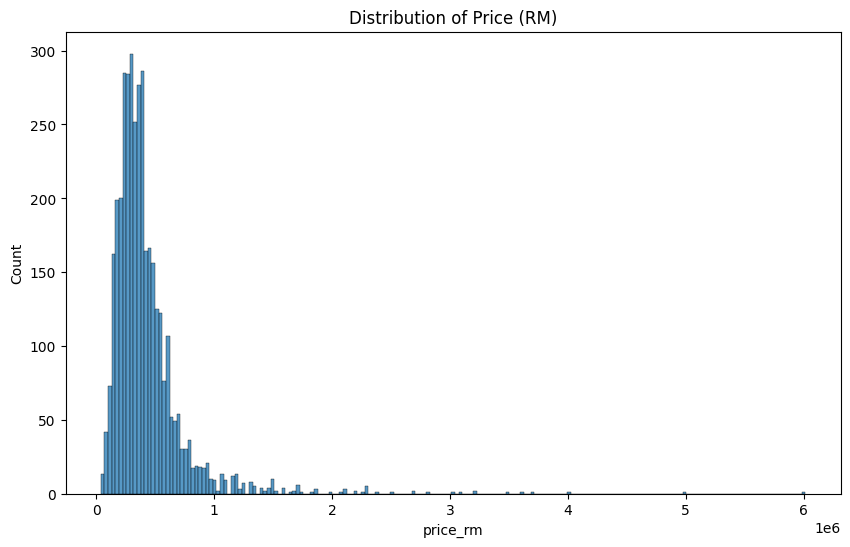

In [1801]:
plt.figure(figsize=(10,6))
sns.histplot(x=df_dummies['price_rm'])
plt.title('Distribution of Price (RM)')
plt.show()

From the histogram, we can see that the condo prices are approximately normally distributed with a slightly right skew due to a few outliers, some even exceeding RM6 million. These extreme outliers could represent luxurious condos or even penthouses which deviate significantly from the market trend.

In [1803]:
df_dummies['price_rm'] = np.log1p(df_dummies['price_rm'])

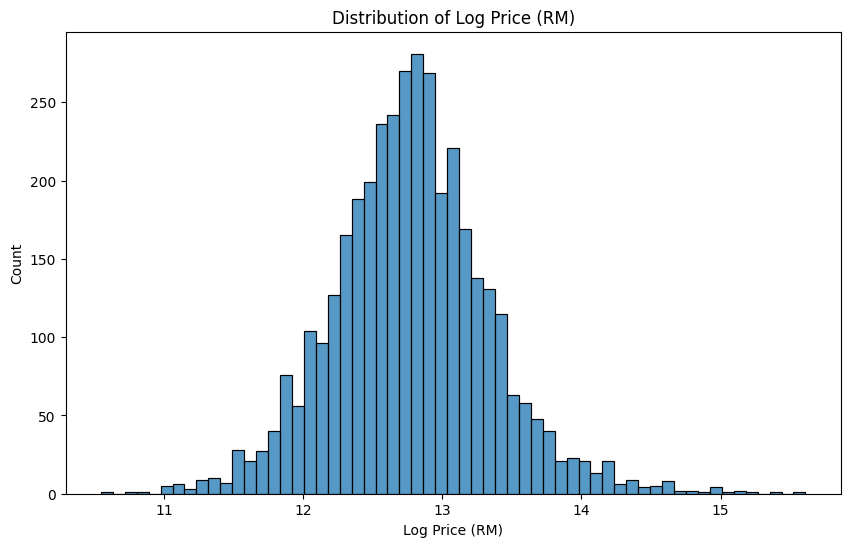

In [1804]:
plt.figure(figsize=(10,6))
sns.histplot(x=df_dummies['price_rm'])
plt.xlabel('Log Price (RM)')
plt.title('Distribution of Log Price (RM)')
plt.show()

In [1868]:
df_dummies['price_rm']

0       12.736704
1       12.429220
2       12.345839
3       11.970357
4       12.628070
          ...    
3995    13.864302
3996    12.751303
3997    12.793862
3998    13.190024
3999    12.468441
Name: price_rm, Length: 3776, dtype: float64

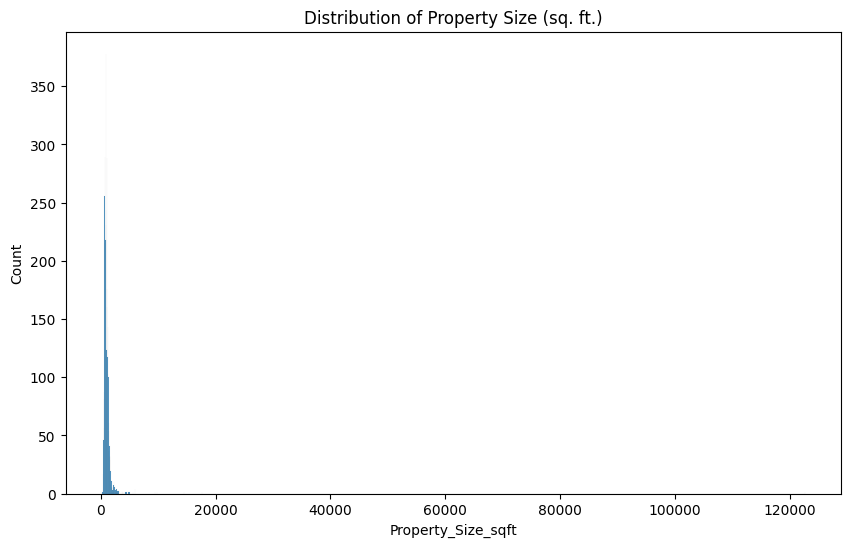

In [1805]:
plt.figure(figsize=(10,6))
sns.histplot(x=df_dummies['Property_Size_sqft'])
plt.title('Distribution of Property Size (sq. ft.)')
plt.show()

In [1806]:
df_dummies['Property_Size_sqft'] = np.log1p(df_dummies['Property_Size_sqft'])

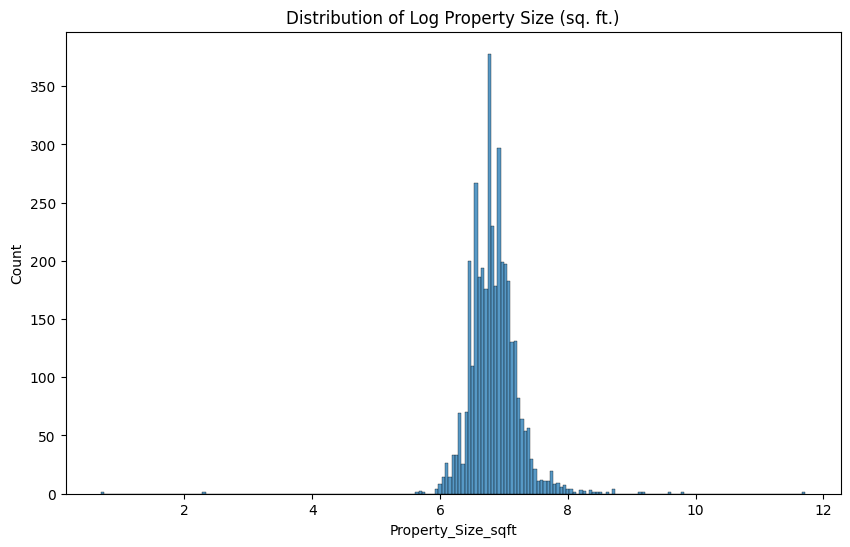

In [1807]:
plt.figure(figsize=(10,6))
sns.histplot(x=df_dummies['Property_Size_sqft'])
plt.title('Distribution of Log Property Size (sq. ft.)')
plt.show()

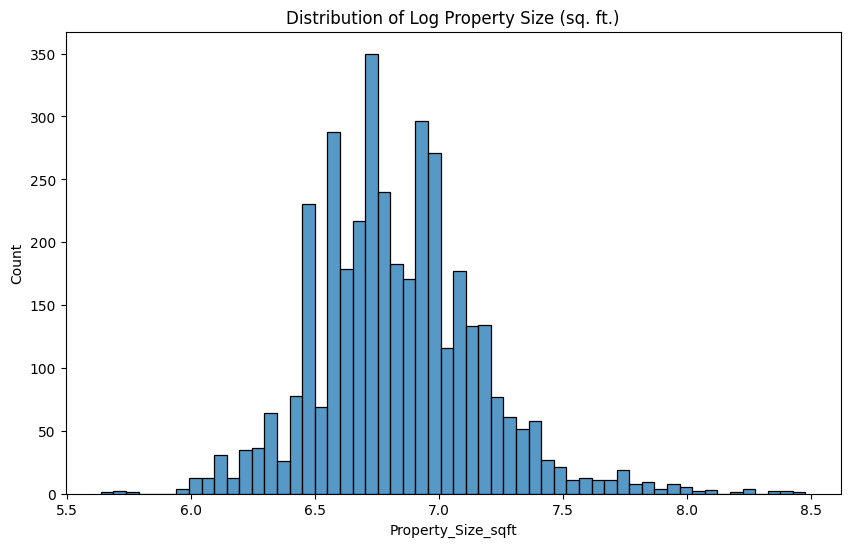

In [1808]:
df_dummies = df_dummies[(df_dummies['Property_Size_sqft'] > 4) & (df_dummies['Property_Size_sqft'] < 8.5)]
plt.figure(figsize=(10,6))
sns.histplot(x=df_dummies['Property_Size_sqft'])
plt.title('Distribution of Log Property Size (sq. ft.)')
plt.show()

<Figure size 1000x500 with 0 Axes>

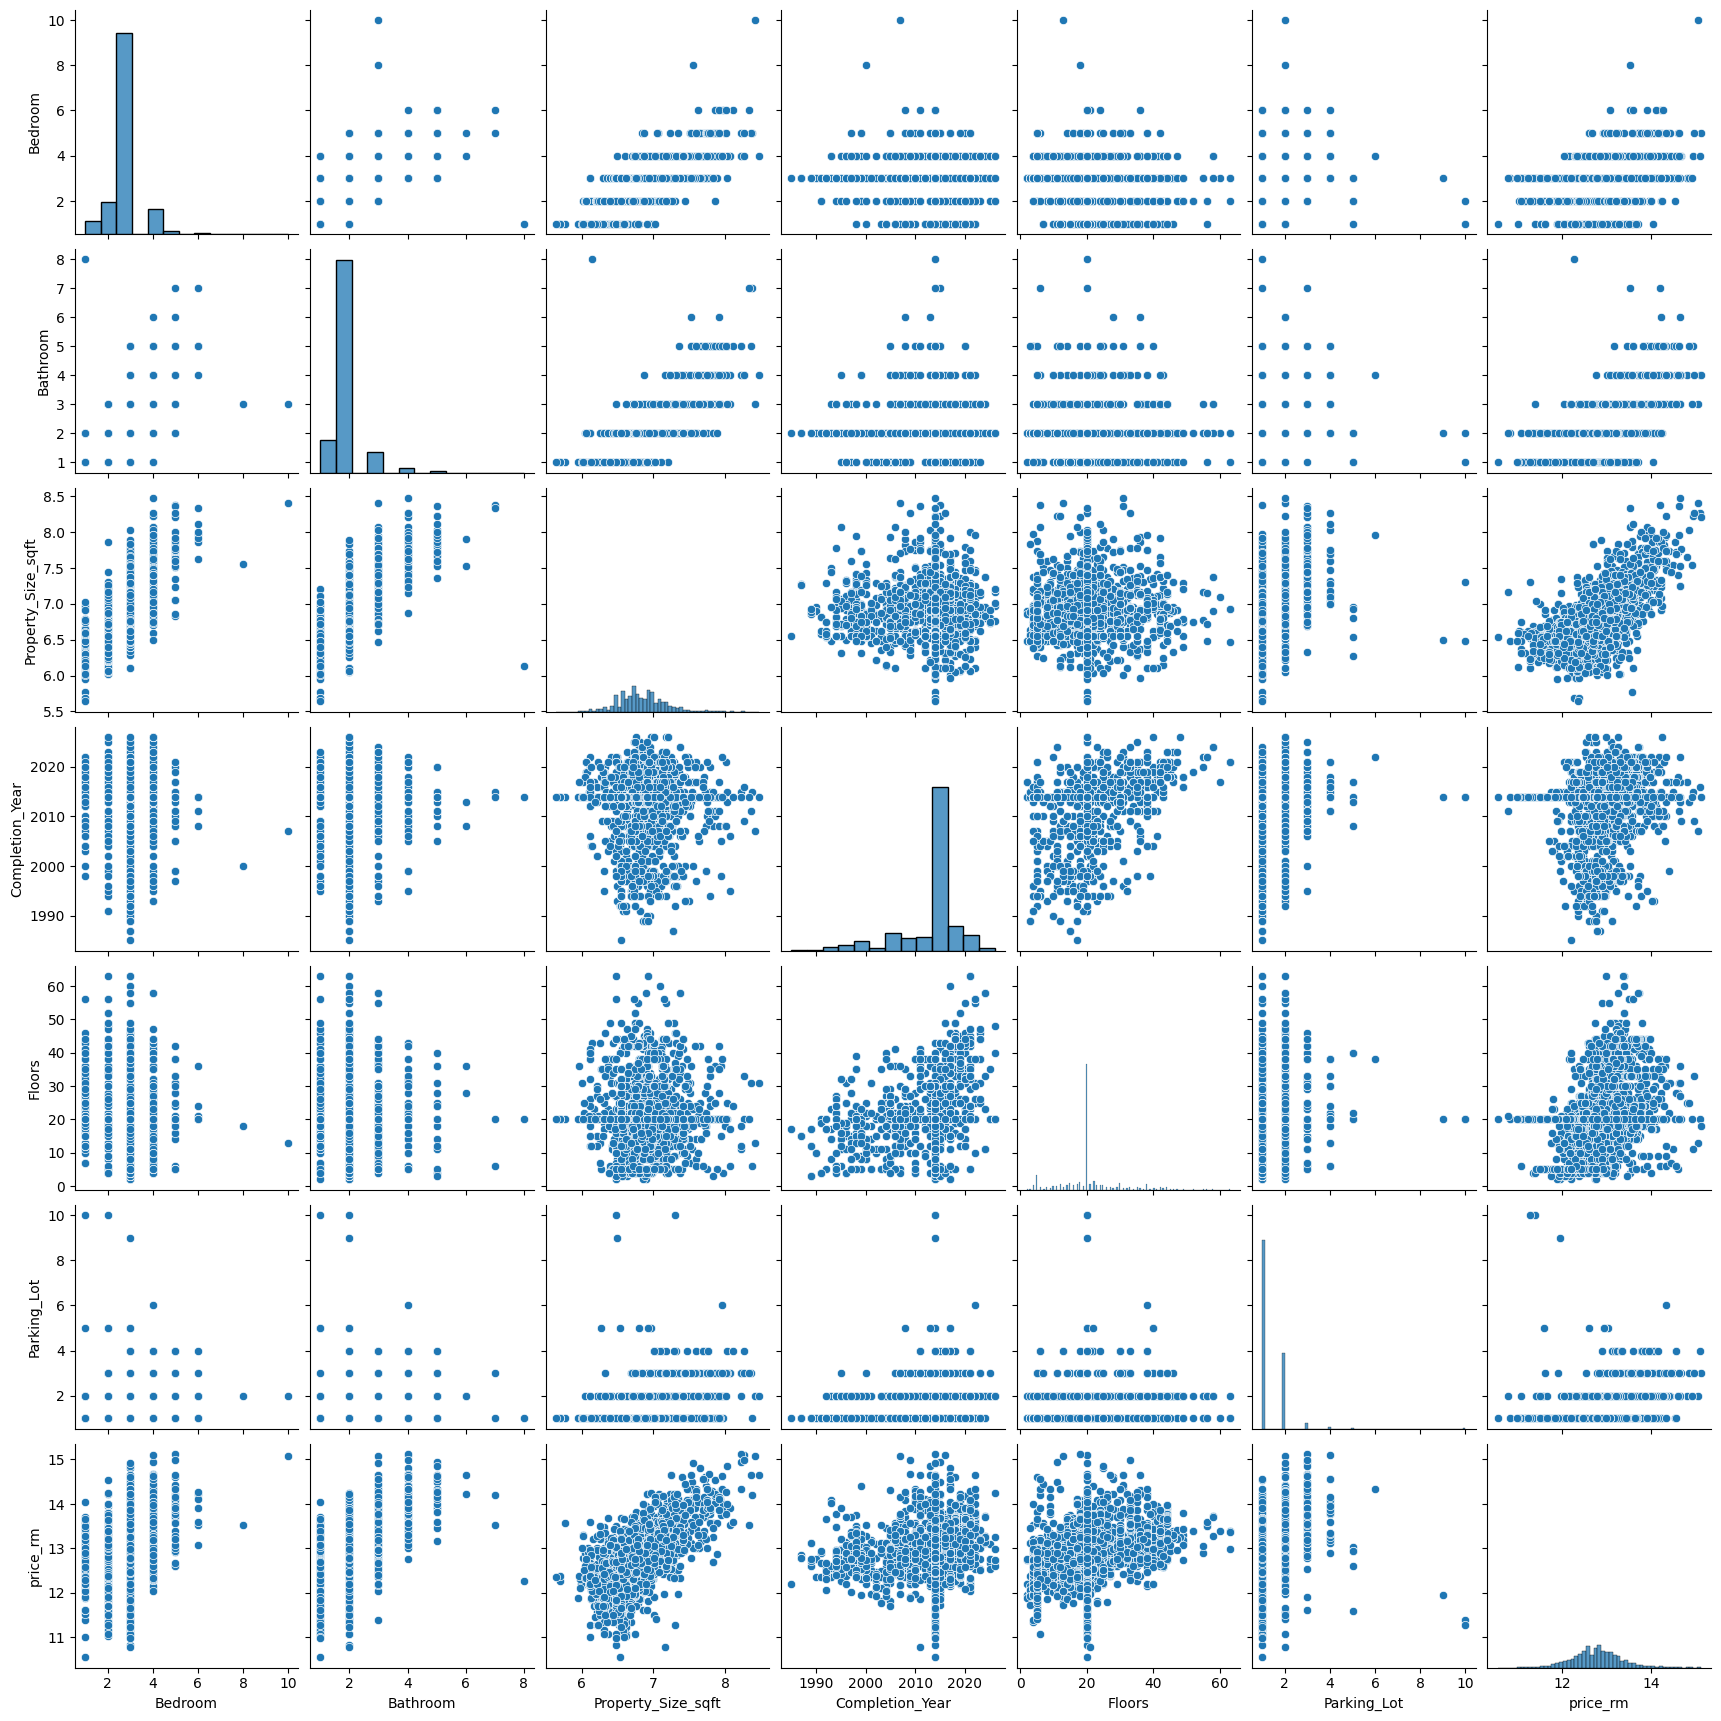

In [1857]:
check_linearity = ['Bedroom','Bathroom','Property_Size_sqft','Completion_Year','Floors','Parking_Lot']
plt.figure(figsize=(10,5))
sns.pairplot(data=df_dummies[check_linearity+['price_rm']])
plt.show()

<Axes: >

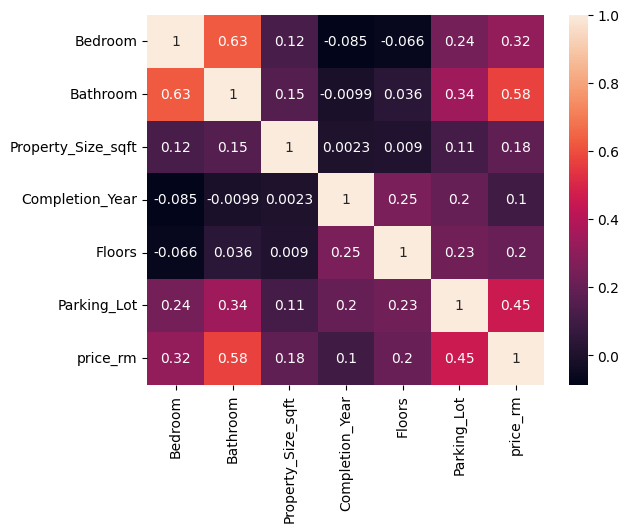

In [1858]:
sns.heatmap(df[check_linearity+['price_rm']].corr(), annot=True)

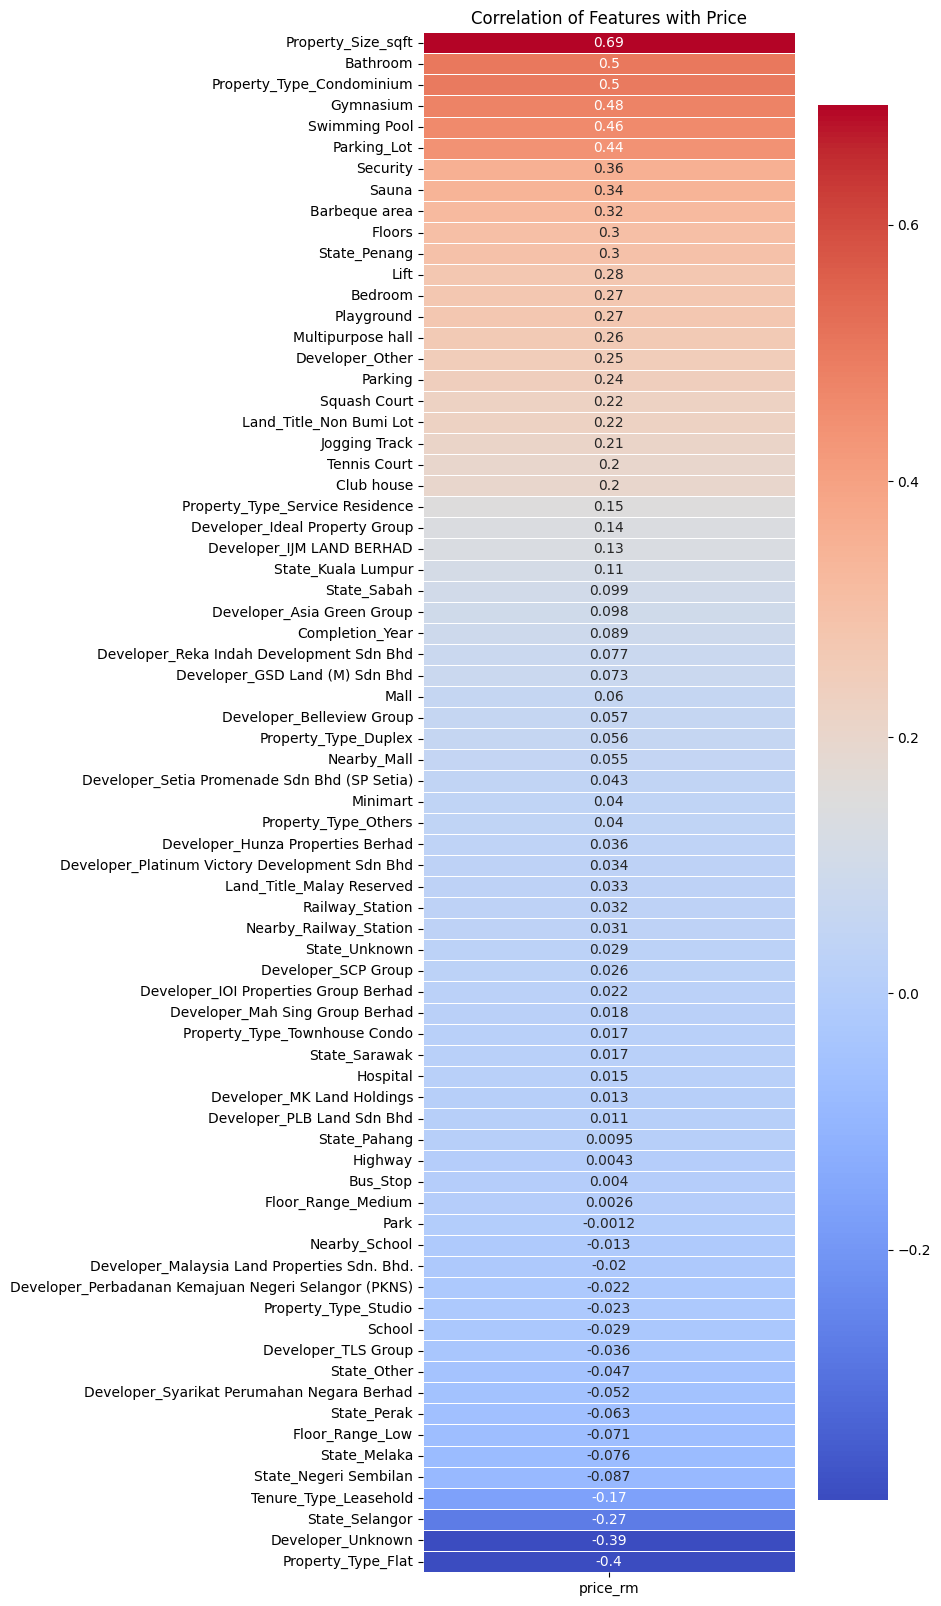

In [1859]:
# Only select numerical columns (excluding object/category types)
numeric_df = df_dummies.select_dtypes(include=['int64', 'float64'])


# Compute correlation with target variable
correlation_with_price = numeric_df.corr()["price_rm"].drop("price_rm").sort_values(ascending=False)

# Plot as heatmap
plt.figure(figsize=(6, 20))  # Taller plot for readability
sns.heatmap(correlation_with_price.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Features with Price")
plt.show()


# Predicting Price

In [1861]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import skew

In [1888]:
X = df_dummies.drop(['price_rm'],axis=1)
y = df_dummies[['price_rm']]

non_log = X.drop(['Property_Size_sqft','Completion_Year'], axis=1).columns.tolist()
X[non_log] = np.log1p(X[non_log])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1890]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Linear Regression

In [1893]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(f'Best rmse: {best_score}')    
    print(f'Best params: {grid.best_params_}')
    
    return best_score

def rmse_CV_train(model):
    rmse = np.sqrt(-cross_val_score(model,X_train_scaled,y_train,scoring ="neg_mean_squared_error",cv=cv))
    return (rmse)

def rmse_CV_test(model):
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=cv))
    return (rmse)

In [1901]:
cv = KFold(n_splits=12, random_state=42, shuffle=True)
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
#print(f"RMSE per fold: {rmse_CV_train(lm)}")
print(f"Mean RMSE for OLS Linear Regression: {rmse_CV_train(lm).mean():.4f}")
y_pred_linear = lm.predict(X_test_scaled)

Mean RMSE for OLS Linear Regression: 0.2709


## Ridge 

In [1904]:
cv = KFold(n_splits=12, random_state=42, shuffle=True)
ridge_alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75]
ridge_cv = RidgeCV(alphas = ridge_alphas, cv=cv)
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha:", ridge_cv.alpha_)
print(f"Mean RMSE for Ridge Regression: {rmse_CV_train(ridge_cv).mean():.4f}")

y_pred_ridge = ridge_cv.predict(X_test_scaled)

Best alpha: 30.0
Mean RMSE for Ridge Regression: 0.2710


## Lasso 

In [1906]:
cv = KFold(n_splits=12, random_state=42, shuffle=True)
lasso_alphas = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.3, 0.5, 1, 3, 5, 10]
lasso_cv = LassoCV(alphas=lasso_alphas, max_iter=10000, random_state=42, cv=cv)
lasso_cv.fit(X_train_scaled, y_train.to_numpy().ravel())
print("Best alpha:", lasso_cv.alpha_)
print(f"Mean RMSE for Ridge Regression: {rmse_CV_train(lasso_cv).mean():.4f}")

y_pred_lasso = lasso_cv.predict(X_test_scaled)


Best alpha: 0.001


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was e

Mean RMSE for Ridge Regression: 0.2706


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Elastic Net

In [1908]:
cv = KFold(n_splits=12, random_state=42, shuffle=True)
e_alphas = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.3, 0.5, 1, 3, 5, 10]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

en_cv = ElasticNetCV(alphas=e_alphas, max_iter=10000, random_state=42, cv=cv, l1_ratio=e_l1ratio)
en_cv.fit(X_train_scaled, y_train.to_numpy().ravel())
print("Best alpha:", en_cv.alpha_)
print(f"Mean RMSE for Ridge Regression: {rmse_CV_train(en_cv).mean():.4f}")

Best alpha: 0.001


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was e

Mean RMSE for Ridge Regression: 0.2706


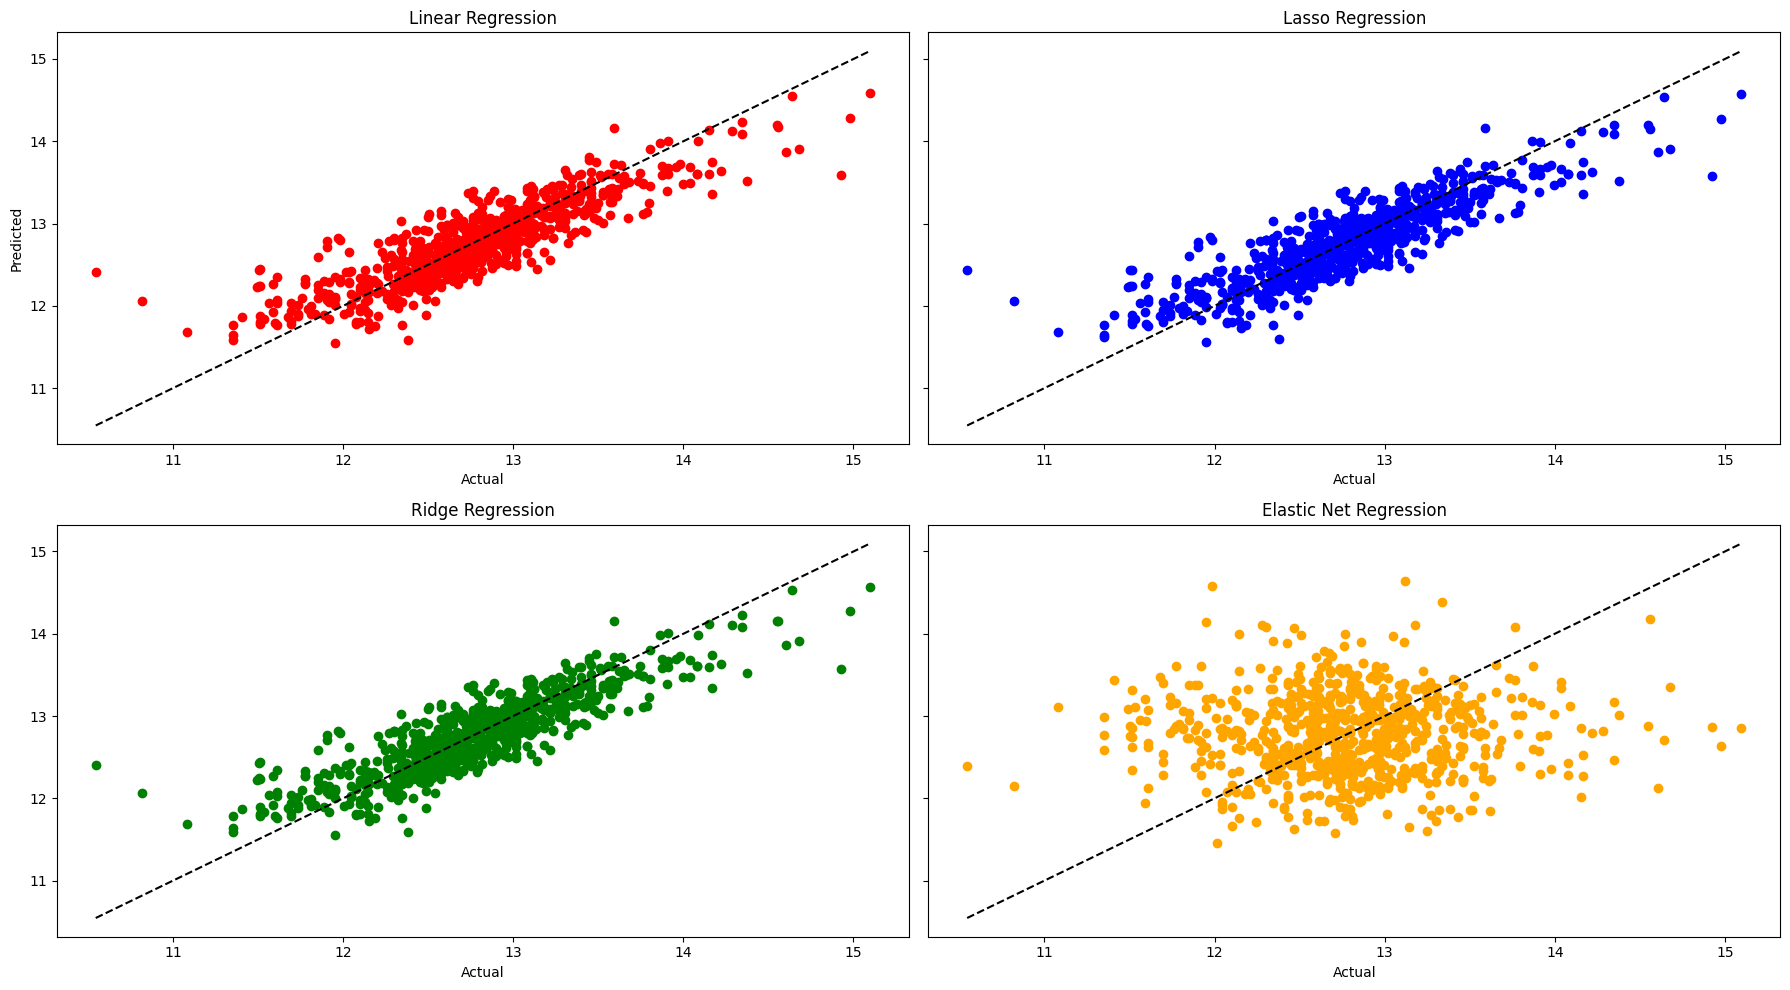

In [1980]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10), sharey=True)

axes[0, 0].scatter(y_test, y_pred_linear, color="red", label="Linear")
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0, 0].set_title("Linear Regression")
axes[0, 0].set_xlabel("Actual",)
axes[0, 0].set_ylabel("Predicted",)

axes[0,1].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,1].set_title("Lasso Regression",)
axes[0,1].set_xlabel("Actual",)

axes[1,0].scatter(y_test, y_pred_ridge, color="green", label="Ridge")
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[1,0].set_title("Ridge Regression",)
axes[1,0].set_xlabel("Actual",)

axes[1,1].scatter(y_test, y_pred_elastic, color="orange", label="Elastic Net")
axes[1,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[1,1].set_title("Elastic Net Regression",)
axes[1,1].set_xlabel("Actual",)

plt.tight_layout()
plt.show()

## Predicting Using Lasso Regression

In [1982]:
cv = KFold(n_splits=12, random_state=42, shuffle=True)
lasso_alphas = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.3, 0.5, 1, 3, 5, 10]
lasso_cv = LassoCV(alphas=lasso_alphas, max_iter=10000, random_state=42, cv=cv)
lasso_cv.fit(X_train_scaled, y_train.to_numpy().ravel())

y_pred_train_log = lasso_cv.predict(X_train_scaled)
y_pred_test_log = lasso_cv.predict(X_test_scaled)

# Calculate metrics on log scale
rmse_log_train = np.sqrt(mean_squared_error(y_train, y_pred_train_log))
rmse_log_test = np.sqrt(mean_squared_error(y_test, y_pred_test_log))
mae_log = mean_absolute_error(y_test, y_pred_test_log)
r2 = r2_score(y_test, y_pred_test_log)

print(f"Best alpha: {lasso_cv.alpha_}")
print(f"Train RMSE (log scale): {rmse_log_train:.4f}")
print(f"Test RMSE (log scale): {rmse_log_test:.4f}")
print(f"Test MAE (log scale): {mae_log:.4f}")
print(f"R² (log scale): {r2:.4f}")

Best alpha: 0.001
Train RMSE (log scale): 0.2647
Test RMSE (log scale): 0.2888
Test MAE (log scale): 0.2153
R² (log scale): 0.7573


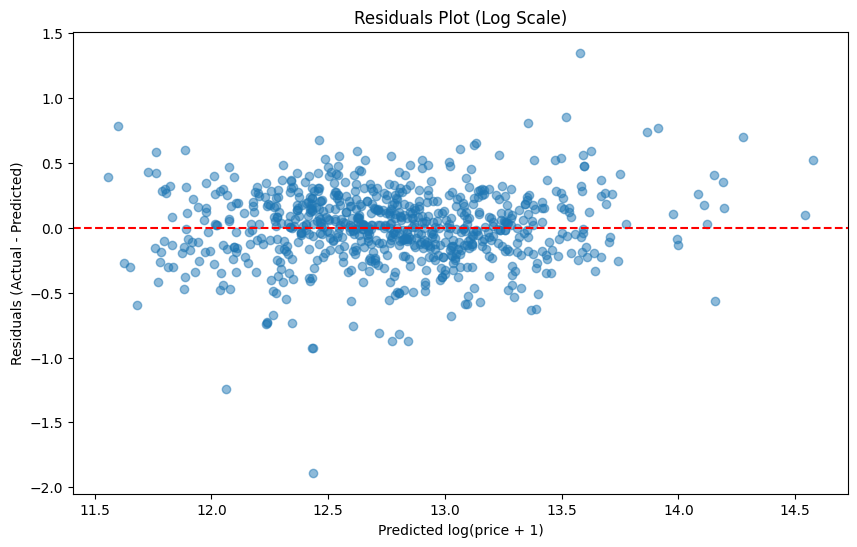

In [1986]:
residuals_log = y_test.squeeze() - y_pred_test_log

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_log, residuals_log, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted log(price + 1)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot (Log Scale)')
plt.show()

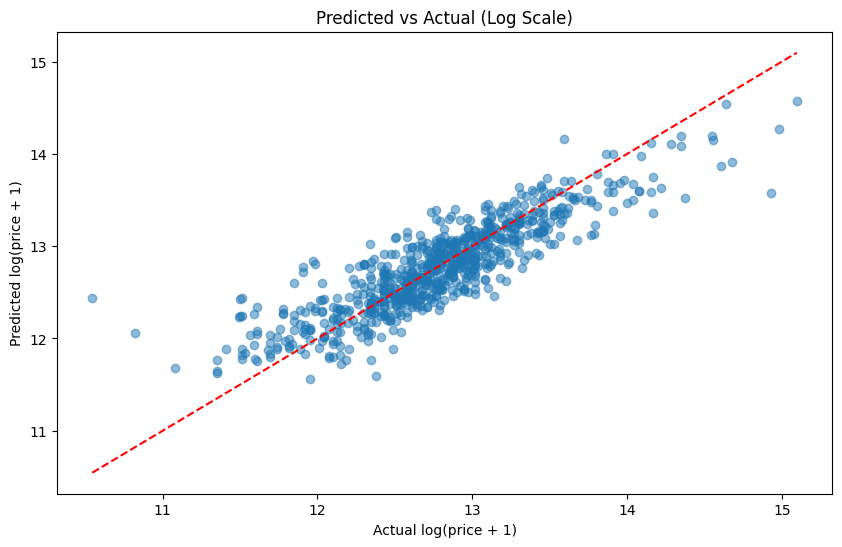

In [1984]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_log, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual log(price + 1)')
plt.ylabel('Predicted log(price + 1)')
plt.title('Predicted vs Actual (Log Scale)')
plt.show()

# Summary


__Model Performance__

- The Lasso regression model applies an L1 penalty to the coefficients, which encourages sparsity by shrinking the weight of some features to zero, keeping only the most important features.
- This shows the model having good predictive power, reaching an R2 score of 0.757 on the log-price of the condos. This indicates that it explains approximately 75.7% of the variance in the target variable.
- The train RMSE is only slightly lower than the test RMSE, depicting that the model generalises well to unseen data without overfitting.

__Model Limitations__

- The performance metrics are reported in log scale due to skewness in priceness distribution.
- Direct price scale errors are less stable and harder to interpret, while log-scale metrics better reflect model quality.
- Additional feature engineering and proper outlier handling might reduce prediction errors and improve price-scale RMSE.

## Unused 

### Completion Year (Unused)

df['Completion_Year'].value_counts(dropna=False)

df['Completion_Year'] = df['Completion_Year'].fillna('Unknown')

plt.figure(figsize=(10,5))
sns.histplot(x=df['Completion_Year'].sort_values())
plt.xticks(rotation=90)
plt.title('Distribution of Condos by Completion Year')
plt.show()

#df = df.drop(['Completion_Year'], axis=1)

### Number of Floors (Unused)

df['Floors'].value_counts(dropna=False)

df['Floors'].describe()

plt.figure(figsize=(10,6))
sns.histplot(df['Floors'])
plt.title('Distribution of Condos against Number of Floors')

df['Floors'] = df['Floors'].fillna(df['Floors'].median())

df = df[(df['Floors'] <= 100)]

df['Floors'].describe()

plt.figure(figsize=(10,6))
sns.histplot(df['Floors'])
plt.title('Distribution of Condos against Number of Floors')

df['Floors'] = df['Floors'].astype('int64')

### Total Units (Unused)

df['Total_Units'].value_counts()

df['Total_Units'] = df['Total_Units'].replace('-', np.nan)
df['Total_Units'] = df['Total_Units'].astype('float')

df['Total_Units'].describe()

sns.histplot(df['Total_Units'])
plt.show()

df['Total_Units'] = df['Total_Units'].fillna(round(df['Total_Units'].median()))

df['Total_Units'].describe()

df['Total_Units'].value_counts()

### Parking Lot (Unused)

df['Parking_Lot'].value_counts()

df['Parking_Lot'] = df['Parking_Lot'].replace('-',np.nan)
df['Parking_Lot'] = df['Parking_Lot'].astype('float')
df['Parking_Lot'].describe()

df['Parking_Lot'] = df['Parking_Lot'].fillna(df['Parking_Lot'].mode()[0])

df['Parking_Lot'].describe()

df['Parking_Lot'].value_counts()

df['Parking_Lot'] = df['Parking_Lot'].astype('int64')

### Price (Unused)

df['price'] = (df['price'].str.replace('RM','').str.replace(' ','').str.strip().astype('float'))

df.head()

df.isna().sum()

### Nearby School (Unused)

df['Nearby_School'].value_counts(dropna=False)

df.loc[df['Nearby_School'].notna(), 'Nearby_School'] = 1

df['Nearby_School'] = df['Nearby_School'].fillna(0)

df['Nearby_School'].value_counts(dropna=False)

df['Nearby_School'] = df['Nearby_School'].astype('int64')
print(df['Nearby_School'].dtypes)

### Nearby Mall (Unused)

df['Nearby_Mall'].value_counts(dropna=False)

df.loc[df['Nearby_Mall'].notna(), 'Nearby_Mall'] = 1

df['Nearby_Mall'] = df['Nearby_Mall'].fillna(0)

df['Nearby_Mall'].value_counts(dropna=False)

### Tenure Type (Unused)

df['Tenure_Type'].value_counts()

df['Tenure_Type'].dtypes

df['Nearby_Mall'] = df['Nearby_Mall'].astype('int64')
print(df['Nearby_Mall'].dtypes)

### Property Type (Unused)

df['Property_Type'].value_counts(dropna=False)

df['Property_Type'].isnull().sum()

df['Property_Type'].isna().sum()

df['Property_Type'].dtypes

### Land Title (Unused)

df['Land_Title'].value_counts()

### Machine learning (Unused)

In [1956]:
cv = KFold(n_splits=12, random_state=42, shuffle=True)
lasso_alphas = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.3, 0.5, 1, 3, 5, 10]
lasso_cv = LassoCV(alphas=lasso_alphas, max_iter=10000, random_state=42, cv=cv)
lasso_cv.fit(X_train_scaled, y_train.to_numpy().ravel())

y_pred_train = lasso_cv.predict(X_train_scaled)
rmse_train = rmse_CV_train(lasso_cv).mean()
rmse_train_price = np.expm1(rmse_train)

y_pred_test = lasso_cv.predict(X_test_scaled)
rmse_test = rmse_CV_test(lasso_cv).mean()
rmse_test_price = np.expm1(rmse_test)

print(f"Best alpha: {lasso_cv.alpha_}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Train RMSE in Price: RM{rmse_train_price}")
print(f"Test RMSE in Price: RM{rmse_test_price}")
print(f"R2: {r2_score(y_test, y_pred_test):.4f}")

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was e

Best alpha: 0.001
Train RMSE: 0.2706
Test RMSE: 0.2964
Train RMSE in Price: RM0.3107422705085932
Test RMSE in Price: RM0.34495293420725753
R2: 0.7573


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [1954]:
y_pred_test_log = lasso_cv.predict(X_test_scaled)

# Back-transform targets and predictions to original price scale
y_test_actual = np.expm1(y_test)
y_pred_test_actual = np.expm1(y_pred_test_log)

# Calculate RMSE and MAE in log scale
rmse_log = mean_squared_error(y_test, y_pred_test_log)
mae_log = mean_absolute_error(y_test, y_pred_test_log)

# Calculate RMSE and MAE in price scale
rmse_price = mean_squared_error(y_test_actual, y_pred_test_actual)
mae_price = mean_absolute_error(y_test_actual, y_pred_test_actual)

# Calculate R² in log scale (since model was trained on log1p target)
r2 = r2_score(y_test, y_pred_test_log)

# Print results
print(f"Best alpha: {lasso_cv.alpha_}")
print(f"Test RMSE (log scale): {rmse_log:.4f}")
print(f"Test MAE (log scale): {mae_log:.4f}")
print(f"Test RMSE (price scale): RM{rmse_price:,.2f}")
print(f"Test MAE (price scale): RM{mae_price:,.2f}")
print(f"R² (log scale): {r2:.4f}")

Train RMSE (log scale): 0.0701
Train MAE (log scale): 0.1950
Train RMSE (price scale): RM23,672,137,188.44
Train MAE (price scale): RM82,831.64


In [1932]:
y_pred_train_log = lasso_cv.predict(X_train_scaled)
y_pred_test_log = lasso_cv.predict(X_test_scaled)

# Back-transform to original price scale
y_train_actual = np.expm1(y_train)
y_pred_train_actual = np.expm1(y_pred_train_log)

y_test_actual = np.expm1(y_test)
y_pred_test_actual = np.expm1(y_pred_test_log)

# Calculate train and test RMSE in price scale
rmse_train_price = mean_squared_error(y_train_actual, y_pred_train_actual)
rmse_test_price = mean_squared_error(y_test_actual, y_pred_test_actual)

# Calculate test MAE in price scale
mae_test_price = mean_absolute_error(y_test_actual, y_pred_test_actual)

print(f"Train RMSE: RM{rmse_train_price:,.2f}")
print(f"Test RMSE: RM{rmse_test_price:,.2f}")
print(f"Test MAE: RM{mae_test_price:,.2f}")

Train RMSE: RM23,672,137,188.44
Test RMSE: RM33,995,945,485.59
Test MAE: RM93,856.07


In [1934]:
rmse_test = mean_squared_error(y_test, y_pred_test_log)
mae_test = mean_absolute_error(y_test, y_pred_test_log)

print(f"Test RMSE: RM{rmse_test:,.2f}")
print(f"Test MAE: RM{mae_test:,.2f}")

Test RMSE: RM0.08
Test MAE: RM0.22


In [1948]:
residuals_log = y_test - y_pred_test_log

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test_log, residuals_log, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted log(price + 1)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot (Log Scale)')
plt.show()

ValueError: Unable to coerce to Series, length must be 1: given 756